## XAFS Data Processing (plotly)

This example shows how to use Larch from Python/Jupyter for basic XAFS data processing:

  1. read data from an Athena Project File
  2. do XAFS background subtraction with autobk()
  3. do XAFS Fourier transform with xfft()

In this version, plotting will be done with Plotly, which will plot to the Jupyter notebook, and
should give more interactivity to the plots compared to inline matplotlib.

For more details on Larch, see https://xraypy.github.io/xraylarch/xafs/

We'll start with reading and exploring the Athena Project File:

In [1]:
from larch.io import read_athena
project = read_athena('../xafsdata/fe_athena.prj')

In [2]:
for name, group in project._athena_groups.items():
    print(name, group)

fe2o3_rt1_xmu <Group 0x2aa6819b2d0>
fe3c_rt_xdi <Group 0x2aa6819b810>
feo_rt1_xmu <Group 0x2aa6819ba50>


> **NOTE** For additional features of working with Athena project files -> [IO_Athena_project.ipynb](./IO_Athena_project.ipynb) 

Let's get that data group for Fe2O3 and look at what that Group object contains

In [3]:
fe2o3 = project.fe2o3_rt1_xmu
for attr in dir(fe2o3):
    print(attr, type(getattr(fe2o3, attr)))

athena_id <class 'str'>
athena_params <class 'larch.symboltable.Group'>
atsym <class 'str'>
callargs <class 'larch.symboltable.Group'>
d2mude <class 'numpy.ndarray'>
dmude <class 'numpy.ndarray'>
e0 <class 'numpy.float64'>
edge <class 'str'>
edge_step <class 'float'>
edge_step_poly <class 'float'>
energy <class 'numpy.ndarray'>
epsk <class 'float'>
epsr <class 'float'>
flat <class 'numpy.ndarray'>
i0 <class 'numpy.ndarray'>
journal <class 'larch.larchlib.Journal'>
label <class 'str'>
mu <class 'numpy.ndarray'>
norm <class 'numpy.ndarray'>
norm_poly <class 'numpy.ndarray'>
post_edge <class 'numpy.ndarray'>
pre_edge <class 'numpy.ndarray'>
pre_edge_details <class 'larch.symboltable.Group'>
sel <class 'int'>
signal <class 'numpy.ndarray'>


There are several components to this Group of data.  We note that there are arrays for `energy` and `mu`.   These are what represent $\mu(E)$.

----------

To plot this data with plotly, we will use a simple Larch wrapper around plotly that gives a plot() function like the wx version.

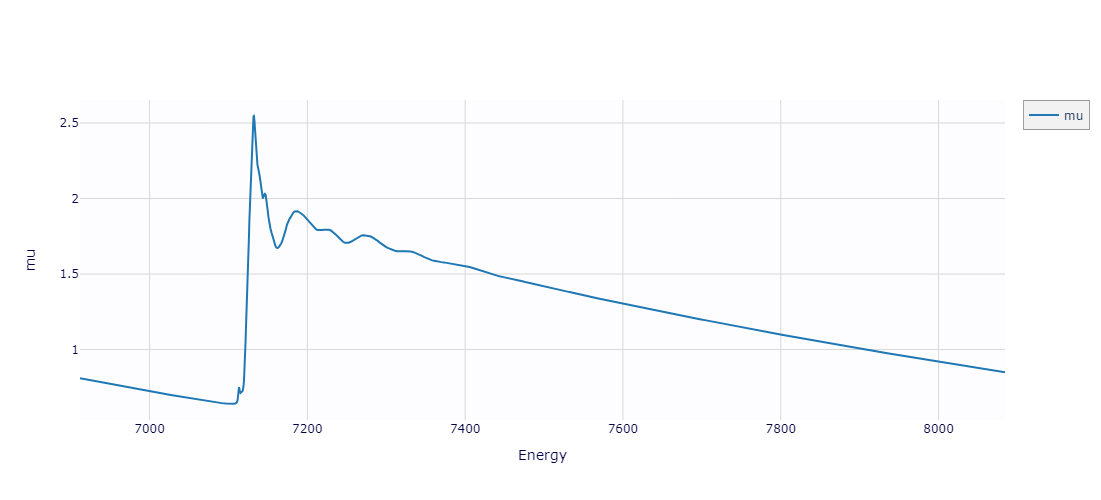

In [11]:
from larch.plot.plotly_xafsplots import plot, multi_plot

plot(fe2o3.energy, fe2o3.mu, label='mu', xlabel='Energy', ylabel='mu')

Now let's remove the XAFS background and extract the EXAFS $\chi(k)$.   We'll use the `autobk()` function (https://xraypy.github.io/xraylarch/xafs/autobk.html)

Note that we pass in the *Group* as the first argument.  The `autobk()` function will add several attributes to this Group -- it will be the container for this dataset.

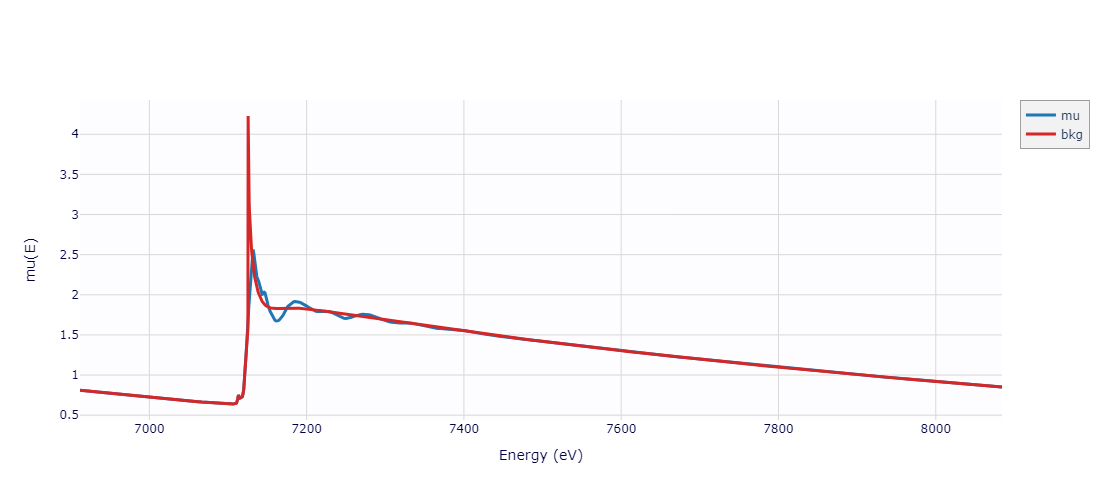

In [13]:
from larch.xafs import autobk
autobk(fe2o3, rbkg=0.9, kweight=2)

multi_plot([dict(xdata=fe2o3.energy, ydata=fe2o3.mu, label='mu', xlabel='Energy (eV)', ylabel='mu(E)'),
            dict(xdata=fe2o3.energy, ydata=fe2o3.bkg, label='bkg')])
           

We'll also want to plot $\chi(k)$.  Note that, at this writing, using latex strings with Plotly in Jupyter is not working..

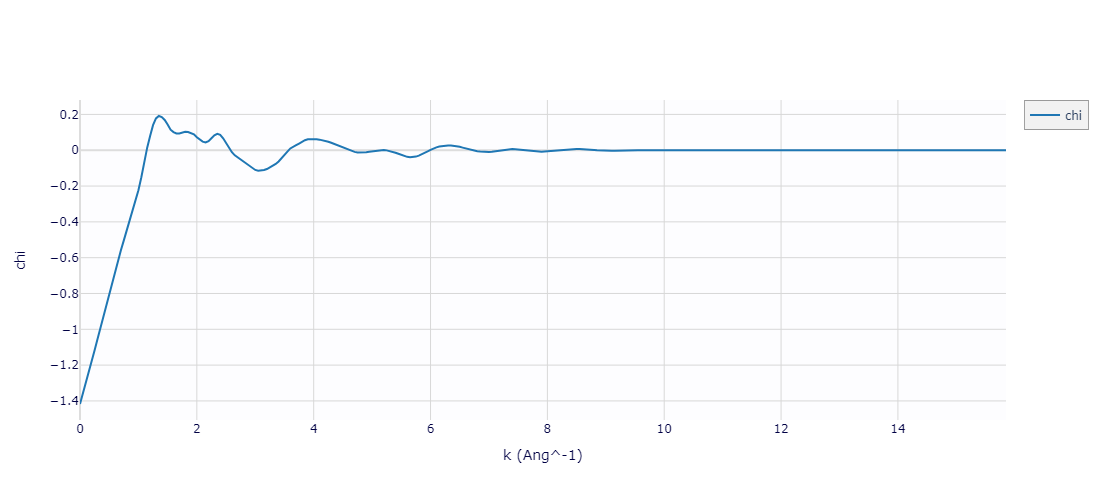

In [15]:
from larch.xafs import autobk
autobk(fe2o3, rbkg=0.85, kweight=2)

plot(fe2o3.k, fe2o3.chi, xlabel='k (Ang^-1)', ylabel='chi', label='chi')

but we usually want to plot $k$-weighted $\chi(k)$:

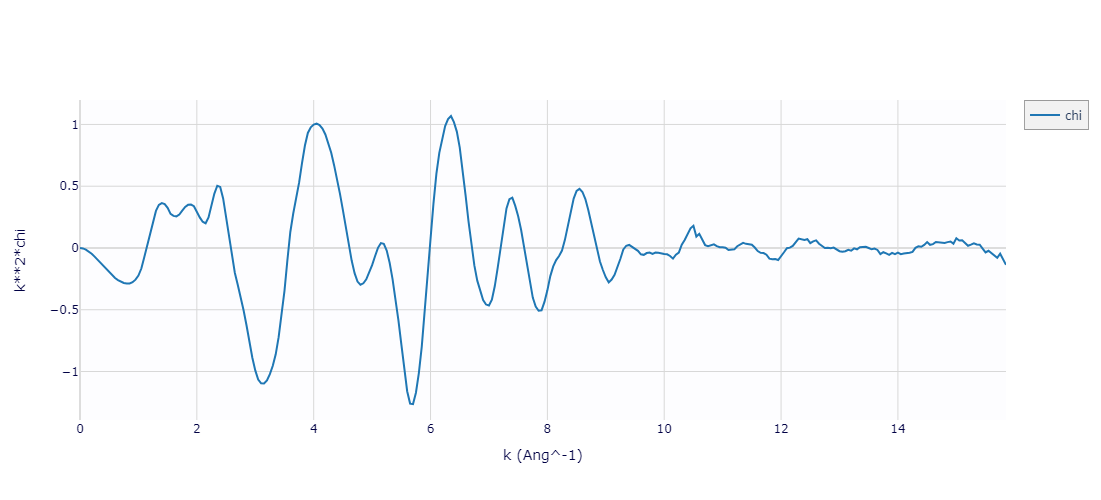

In [16]:
plot(fe2o3.k, fe2o3.chi*fe2o3.k**2, xlabel='k (Ang^-1)', ylabel='k**2*chi', label='chi')

and now we will do the Fourier transform from $\chi(k)$ to $\chi(R)$, using the `xftf()` (XAFS Fourier Transform Forward) function.  We'll do the Fourier transform on $k^2$ weighted $\chi(k)$ with a Kaiser-Bessel Window. 

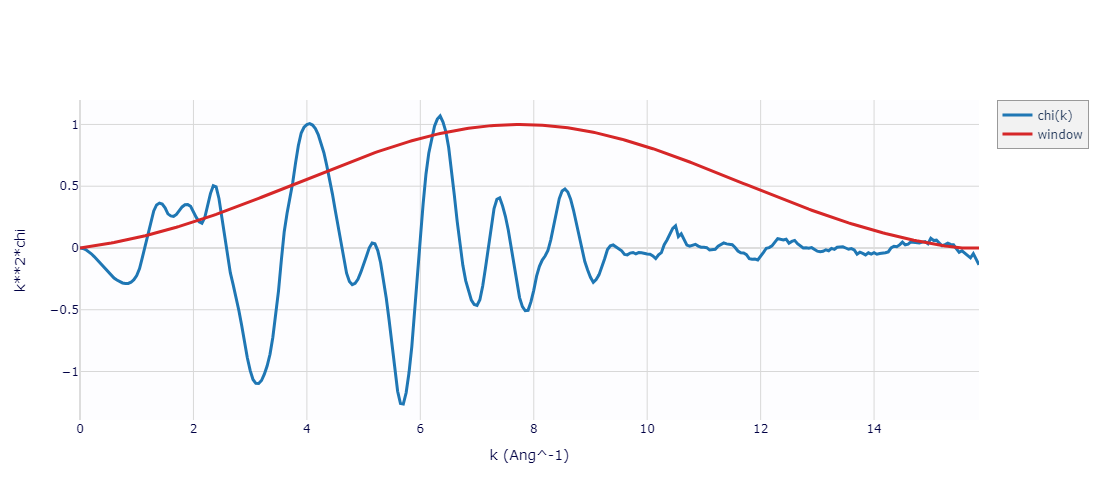

In [17]:
from larch.xafs import xftf
xftf(fe2o3, kweight=2, kmin=2, kmax=13.0, dk=5, kwindow='Kaiser-Bessel')

multi_plot([dict(xdata=fe2o3.k, ydata=fe2o3.chi*fe2o3.k**2, xlabel='k (Ang^-1)', ylabel='k**2*chi', label='chi(k)'),
            dict(xdata=fe2o3.k, ydata=fe2o3.kwin, label='window')])

and we can show that data as $\chi(R)$:

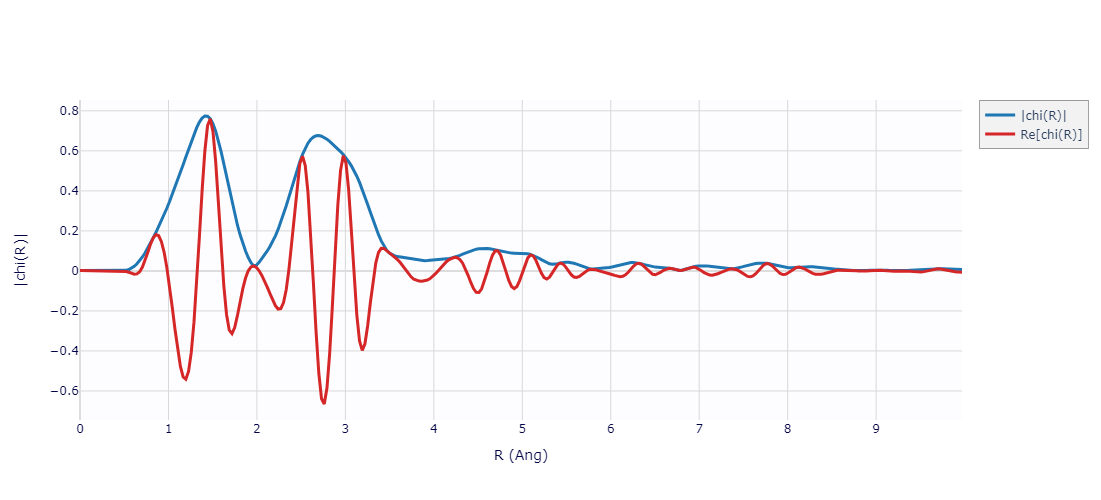

In [18]:
multi_plot([dict(xdata=fe2o3.r, ydata=fe2o3.chir_mag, xlabel='R (Ang)', ylabel='|chi(R)|', label='|chi(R)|'),
            dict(xdata=fe2o3.r, ydata=fe2o3.chir_re, label='Re[chi(R)]')])


let's try another dataset with all the processing and plotting at once:

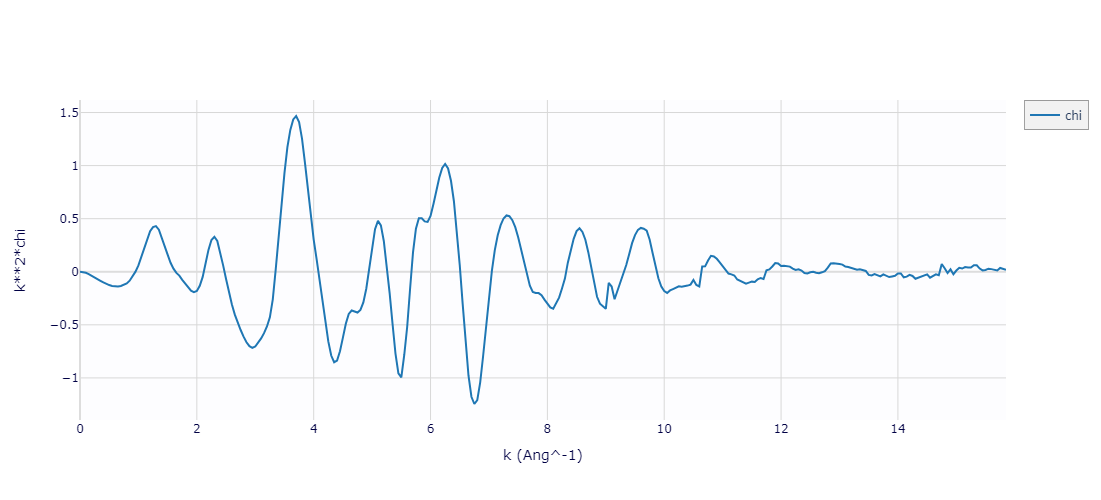

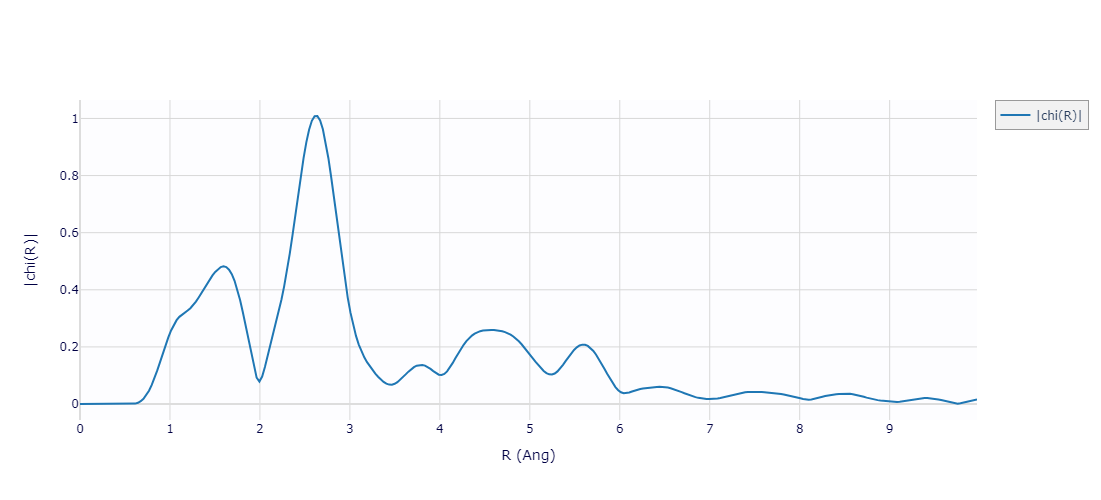

In [19]:
feo = project.feo_rt1_xmu

autobk(feo, rbkg=0.9, kweight=2)
xftf(feo, kweight=2, kmin=2, kmax=13.0, dk=5, kwindow='Kaiser-Bessel')


plot(feo.k, feo.chi*feo.k**2, xlabel='k (Ang^-1)', ylabel='k**2*chi', label='chi')

plot(feo.r, feo.chir_mag, xlabel='R (Ang)', ylabel='|chi(R)|', label='|chi(R)|')